#### Rudrendu Paul, MBA+MS (Analytics), Boston University (May, 2019)

## Analytics based marketing campaign for improving ROI

This is a real data set from the marketing campaign of a bank with over 40000+ people on the list

Average response rate of people on list is 11% and hence, marketing to each person on the list incurs a loss of 
$ 34,000 with a ROI of negative 44 %

This machine learning model identifies the top customer segments with high probability of conversion of around 40%
(4X the average) and provides a positive ROI of 150 % on a targetted list of people. 

#### Importing Libraries

In [245]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

# # # Multiple Output display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#### Marketing campaign dataset

Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [246]:
dataset = pd.read_csv('bank-additional-full.csv')
dataset.shape
dataset.head(10)

(41188, 21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Exploring the distribution of output variable

Text(0.5,1,'yes/no (overall)')

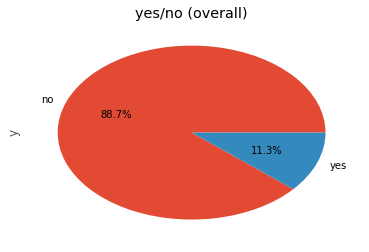

In [247]:
plt.title('yes/no (overall)')
dataset["y"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

#### Analysis: 

Average response rate is 11.1%

### Exploring the variables

##### Age

Text(0.5,1,'age (overall)')

Text(0.5,1,'age (yes)')

Text(0.5,1,'age (no)')

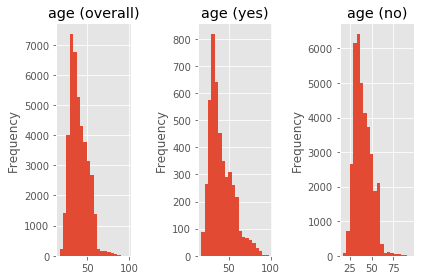

In [248]:
plt.subplot(131)
plt.title('age (overall)')
Output = None
dataset["age"].plot(kind = "hist", bins = 20)

plt.subplot(132)
plt.title('age (yes)')
dataset["age"][dataset["y"] == "yes"].plot(kind = "hist", bins = 20)

plt.subplot(133)
plt.title('age (no)')
dataset["age"][dataset["y"] == "no"].plot(kind = "hist", bins = 20)
plt.tight_layout()

##### Analysis: 

The long tailed distribution for the age of participants who responded 'yes', implies that people who responded 'yes' on average had higher age than the people who responded 'no'.

##### Job

Text(0.5,1,'Job (overall)')

Text(0.5,1,'Job (yes)')

Text(0.5,1,'Job (no)')

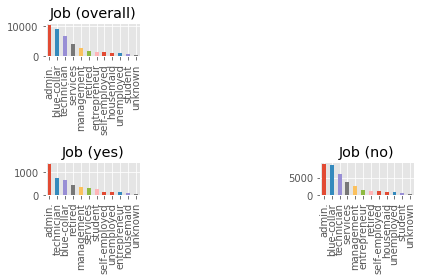

In [249]:
plt.subplot(231)
plt.title('Job (overall)')
dataset["job"].value_counts().plot(kind = "bar")
 
plt.subplot(234)
plt.title('Job (yes)')
dataset["job"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

plt.subplot(236)
plt.title('Job (no)')
dataset["job"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

# Analysis: People who positively responded to the campaign had a higher age than the ones who did not respond to the 
# campaign

#### Analysis: 

"Blue collared" job holders had responded "yes" on a higher porportion.

##### Marital Status

Text(0.5,1,'marital (overall)')

Text(0.5,1,'marital (yes)')

Text(0.5,1,'marital (no)')

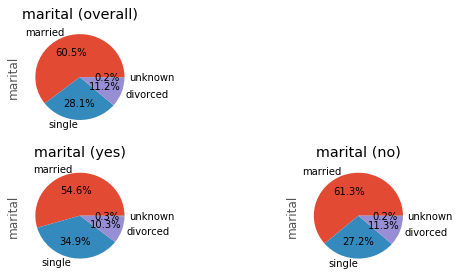

In [250]:
plt.subplot(231)
plt.title('marital (overall)')
dataset["marital"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(234)
plt.title('marital (yes)')
dataset["marital"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(236)
plt.title('marital (no)')
dataset["marital"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

# Analysis: On average, married people and singles responded more positively to the campaign

##### Analysis: 

Singles are on average more likely to positively respond to this campaign than those married and divorced. 

##### Education level

Text(0.5,1,'education (overall)')

Text(0.5,1,'education (yes)')

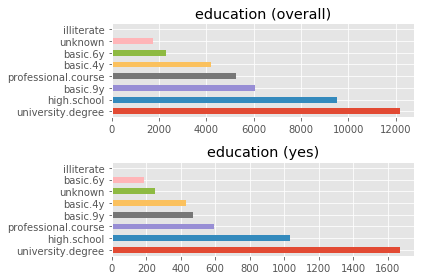

In [264]:
plt.subplot(211)
plt.title('education (overall)')
dataset["education"].value_counts().plot(kind = "barh")

plt.subplot(212)
plt.title('education (yes)')
dataset["education"][dataset["y"] == "yes"].value_counts().plot(kind = "barh")

plt.tight_layout()

##### Analysis: 

For people who responed 'yes', the top 4 segments had education of university degree, high school, professional course and  basic.9y.

##### Loan default

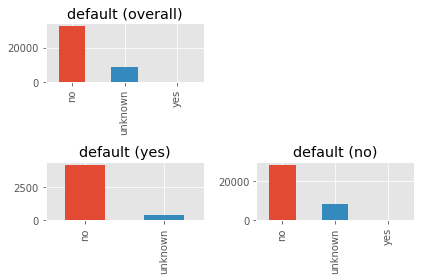

In [207]:
plt.subplot(221)
plt.title('default (overall)')
dataset["default"].value_counts().plot(kind = "bar")

plt.subplot(223)
plt.title('default (yes)')
dataset["default"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

plt.subplot(224)
plt.title('default (no)')
dataset["default"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

#### Analysis: 

Loan default does not add any new information, so lets drop this variable.

##### Contact

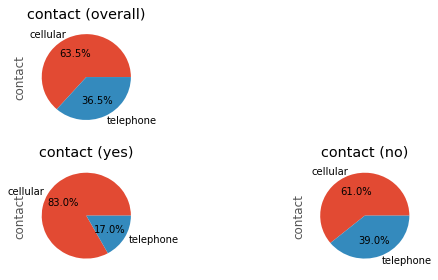

In [208]:
plt.subplot(231)
plt.title('contact (overall)')
dataset["contact"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(234)
plt.title('contact (yes)')
dataset["contact"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(236)
plt.title('contact (no)')
dataset["contact"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

##### Analysis: 

People who were contacted by cell phone, on average responded more positively.

##### Month

Text(0.5,1,'month (overall)')

Text(0.5,1,'month (yes)')

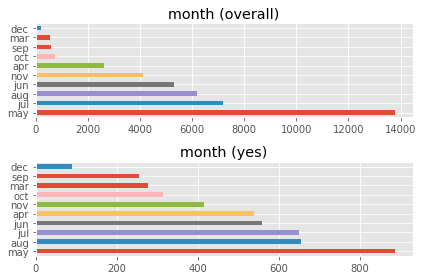

In [263]:
plt.subplot(211)
plt.title('month (overall)')
dataset["month"].value_counts().plot(kind = "barh")

plt.subplot(212)
plt.title('month (yes)')
dataset["month"][dataset["y"] == "yes"].value_counts().plot(kind = "barh")

plt.tight_layout()

##### Analysis: 

May, June, July and August are the top 4 months which yielded the most conversion.

##### Day_of_week

Text(0.5,1,'day_of_week (overall)')

Text(0.5,1,'day_of_week (yes)')

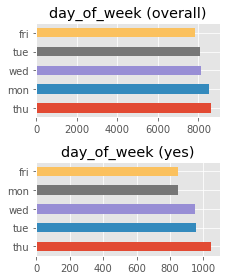

In [265]:
plt.subplot(221)
plt.title('day_of_week (overall)')
dataset["day_of_week"].value_counts().plot(kind = "barh")

plt.subplot(223)
plt.title('day_of_week (yes)')
dataset["day_of_week"][dataset["y"] == "yes"].value_counts().plot(kind = "barh")

plt.tight_layout()


#### Analysis: 

On average, Thursday, Tuesday and Wednesday had a higher positive response rate.

##### Duration

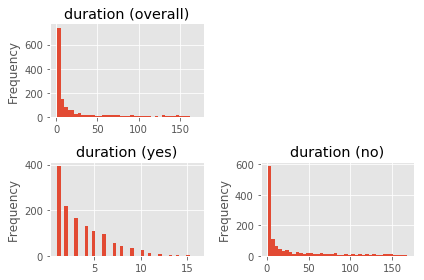

In [211]:
plt.subplot(221)
plt.title('duration (overall)')
dataset["duration"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(223)
plt.title('duration (yes)')
dataset["duration"][dataset["y"] == "yes"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(224)
plt.title('duration (no)')
dataset["duration"][dataset["y"] == "no"].value_counts().plot(kind = "hist", bins = 40)
plt.tight_layout()

#### Analysis: 

On average default rate was lower among people who responded positively, note the long tail in "default (no)".

##### Loan

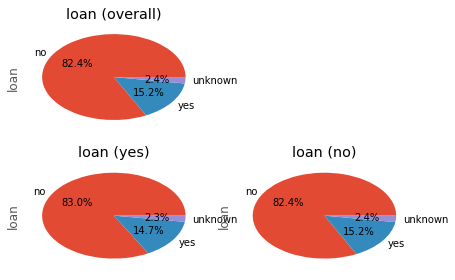

In [212]:
plt.subplot(221)
plt.title('loan (overall)')
dataset["loan"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('loan (yes)')
dataset["loan"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('loan (no)')
dataset["loan"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

#### Analysis: 

Loan variable shall be dropped as it does not add any additional information 

##### Campaign

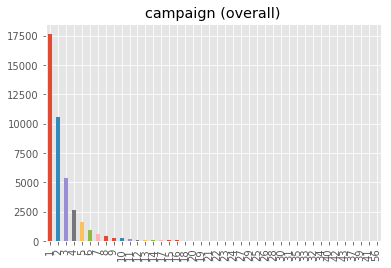

In [213]:
plt.title('campaign (overall)')
dataset["campaign"].value_counts().plot(kind = "bar")

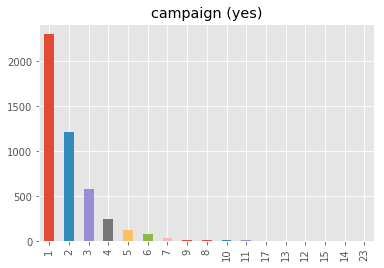

In [214]:
plt.title('campaign (yes)')
dataset["campaign"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

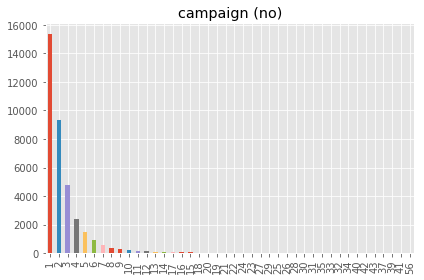

In [215]:
plt.title('campaign (no)')
dataset["campaign"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

#### Analysis: 

For campign # 1-4, people responded "yes", at a higher proportion than the later ones. 

##### Previous (contact)

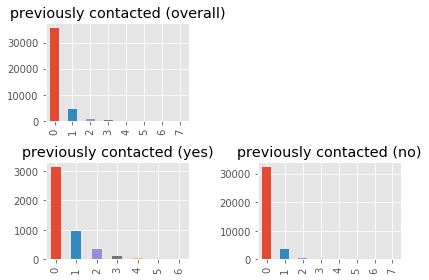

In [216]:
plt.subplot(221)
plt.title('previously contacted (overall)')
dataset["previous"].value_counts().plot(kind = "bar")

plt.subplot(223)
plt.title('previously contacted (yes)')
dataset["previous"][dataset["y"] == "yes"].value_counts().plot(kind =  "bar")

plt.subplot(224)
plt.title('previously contacted (no)')
dataset["previous"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

##### Analysis: 

People who were contacted more than once had a higher probability of responding positively. 

### Summary of variable analysis:

People who responded yes have the following characteristics:

1) higher average age,

2) blue collared jobs, 

3) single,

4) contacted by cellular phone call,

5) Months contacted: May, June, July and August,

6) Day of week: Thursday, Tuesday and Wednesday,

7) Low loan default rate,

8) Campaign #: 1,2,3 & 4,

9) previously contacted more than once.

### Feature Selection

##### Feature selection (& droping columns)

In [217]:
dataset = dataset.drop(["default", "loan"], axis = "columns")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(9)
memory usage: 6.0+ MB


##### Missing data & unnecesary features

In [218]:
dataset = dataset[dataset != 'unknown']
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 19 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
housing           38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
duration          38245 non-null int64
campaign          38245 non-null int64
pdays             38245 non-null int64
previous          38245 non-null int64
poutcome          38245 non-null object
emp.var.rate      38245 non-null float64
cons.price.idx    38245 non-null float64
cons.conf.idx     38245 non-null float64
euribor3m         38245 non-null float64
nr.employed       38245 non-null float64
y                 38245 non-null object
dtypes: float64(5), int64(5), object(9)
memory usage: 5.8+ MB


##### Encoding the predictor variable

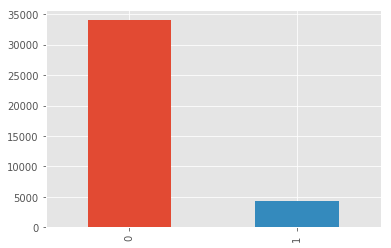

In [219]:
# Encoding the predictor variable to 1 for yes and 0 for no

mask = dataset["y"] == "yes"
dataset.loc[mask, "y"] = 1

mask = dataset["y"] == "no"
dataset.loc[mask, "y"] = 0

dataset["y"].value_counts().plot(kind = "bar")
dataset["y"] = dataset["y"].astype(int)

#####  Predictor variable for regression model

In [220]:
y = dataset["y"]
y.head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
8     0
9     0
11    0
Name: y, dtype: int32

#####  Numerical variables

In [221]:
num_cols = ["age", "duration", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
dataset[num_cols].head(5)

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,999,0,1.1,93.994,-36.4,4.857,5191.0


#####  Categorical variables

In [222]:
cat_cols = ["job", "marital", "education", "housing", "contact", "month", "day_of_week", "campaign", "poutcome"]
dataset[cat_cols].head(5)

,job,marital,education,housing,contact,month,day_of_week,campaign,poutcome
0,housemaid,married,basic.4y,no,telephone,may,mon,1,nonexistent
1,services,married,high.school,no,telephone,may,mon,1,nonexistent
2,services,married,high.school,yes,telephone,may,mon,1,nonexistent
3,admin.,married,basic.6y,no,telephone,may,mon,1,nonexistent
4,services,married,high.school,no,telephone,may,mon,1,nonexistent


#####  Dummy variables

In [223]:
# Creating dummy variables for categorical types

dummies = pd.get_dummies(dataset[cat_cols])
#dummies.head(5)

# Combining dummy variables and numeric varianbles
dataset1 = dataset[num_cols]

dataset2 = pd.concat([dataset1, dummies, y], axis=1)
dataset = dataset2

dataset.head(5)

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,149,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
2,37,226,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
3,40,151,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,307,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0


#####  Input and output variables

In [224]:
X = dataset.drop("y", axis = "columns") # drops the predictor variable from the input dataset
y = dataset["y"]
X.head(5)

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,149,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
2,37,226,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
3,40,151,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,307,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0


#####  Training and test data sets

In [225]:
# Splitting the dataset into the training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_test.head(5)

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
24572,30,563,999,0,-0.1,93.200,-42.0,4.191,5195.8,2,...,0,0,0,1,0,0,0,0,1,0
38529,58,509,999,0,-3.4,92.431,-26.9,0.724,5017.5,1,...,1,0,0,0,0,0,1,0,1,0
14012,46,71,999,0,1.4,93.918,-42.7,4.963,5228.1,2,...,0,0,1,0,0,0,0,0,1,0
2206,39,299,999,0,1.1,93.994,-36.4,4.857,5191.0,5,...,0,0,0,1,0,0,0,0,1,0
30011,46,94,999,0,-1.8,93.075,-47.1,1.405,5099.1,7,...,0,0,0,0,0,0,1,0,1,0


#####  Feature scaling

In [226]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

X_train.head(5)

C:\Users\Rudrendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rudrendu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Rudrendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
8173,-0.756304,-0.203903,0.193576,-0.347457,0.842045,1.549096,-0.270878,0.718667,0.846713,1,...,0,0,0,0,0,1,0,0,1,0
11166,-0.561786,-0.730307,0.193576,-0.347457,0.842045,1.549096,-0.270878,0.774651,0.846713,1,...,0,0,0,0,1,0,0,0,1,0
22876,0.897101,-0.184691,0.193576,-0.347457,0.842045,-0.219613,0.958467,0.776959,0.846713,4,...,0,0,0,1,0,0,0,0,1,0
5500,0.216287,-0.134741,0.193576,-0.347457,0.650703,0.733168,0.893765,0.714626,0.331150,1,...,0,0,0,1,0,0,0,0,1,0
23445,0.702583,-0.203903,0.193576,-0.347457,0.842045,-0.219613,0.958467,0.776382,0.846713,2,...,0,0,0,0,0,0,1,0,1,0


### Feature Engineering

#####  Selecting the top 10 principal components

In [227]:
# Principal coponents chosen:

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [228]:
print("% of variation explained by the top 10 principal components")
round(sum(explained_variance)*100)

% of variation explained by the top 10 principal components


85.0

##### Variation explained by the top 10 principal components:

By applying principal componenet analysis, I have reduced the number of variables from 53 to 10 which explain 85 % of variation in the dataset.

In [233]:
# # Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Linear logistic regression model

In [236]:
# Fitting a linear Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( )
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)

print("AUC %:")
round(roc_auc_score(y_test, y_pred)*100)
print("Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:")
print ("Accuracy mean %:")
round(accuracies.mean()*100)
print ("Accuracy standard deviation %:")
round(accuracies.std()*100)

classifier1 = classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

,0
0,0
1,1
2,0
3,0
4,0


Accuracy of model
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      8535
          1       0.67      0.39      0.49      1027

avg / total       0.90      0.91      0.90      9562

AUC %:


68.0

Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:
Accuracy mean %:


92.0

Accuracy standard deviation %:


1.0

##### Naive bayes classifier model

In [237]:
# Naive bayes classifier model

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC %:")
round(roc_auc_score(y_test, y_pred)*100)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:")
print ("Accuracy mean %:")
round(accuracies.mean()*100)
print ("Accuracy standard deviation %:")
round(accuracies.std()*100)

GaussianNB(priors=None)

,0
0,0
1,1
2,0
3,0
4,0


Accuracy of model
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      8535
          1       0.49      0.51      0.50      1027

avg / total       0.89      0.89      0.89      9562

AUC %:


73.0

Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:
Accuracy mean %:


89.0

Accuracy standard deviation %:


1.0

##### Decision tree classifier model

In [238]:
# Fitting a decision tree classifier to the training set

from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC %:")
round(roc_auc_score(y_test, y_pred)*100)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:")
print ("Accuracy mean %:")
round(accuracies.mean()*100)
print ("Accuracy standard deviation %:")
round(accuracies.std()*100)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

,0
0,0
1,0
2,0
3,0
4,0


Accuracy of model
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      8535
          1       0.48      0.50      0.49      1027

avg / total       0.89      0.89      0.89      9562

AUC %:


72.0

Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:
Accuracy mean %:


89.0

Accuracy standard deviation %:


1.0

##### Random forest classifier model

In [239]:
# Fitting a random forest classifier to the training set

from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC %:")
round(roc_auc_score(y_test, y_pred)*100)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:")
print ("Accuracy mean %:")
round(accuracies.mean()*100)
print ("Accuracy standard deviation %:")
round(accuracies.std()*100)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

,0
0,0
1,0
2,0
3,0
4,0


Accuracy of model
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      8535
          1       0.59      0.40      0.48      1027

avg / total       0.89      0.91      0.90      9562

AUC %:


68.0

Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:
Accuracy mean %:


91.0

Accuracy standard deviation %:


1.0

#####  Support vector machine (SVM) model

In [240]:
# Support vector machine (SVM) model

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC %:")
round(roc_auc_score(y_test, y_pred)*100)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:")
print ("Accuracy mean %:")
round(accuracies.mean()*100)
print ("Accuracy standard deviation %:")
round(accuracies.std()*100)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

,0
0,0
1,1
2,0
3,0
4,0


Accuracy of model
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      8535
          1       0.67      0.40      0.50      1027

avg / total       0.90      0.91      0.91      9562

AUC %:


69.0

Accuracy from 10 random test samples, by applying segments k-fold cross validation technique:
Accuracy mean %:


91.0

Accuracy standard deviation %:


0.0

####  Model Selection

Linear logistic regression gives the best results, based on the AUC score and the estimated model accuracy scores from k-fold cross validation method.

#####  Response predicted by chosen model

Porb_1    0.190303
Name: 1500, dtype: float64

Average response rate for customers in the new list is 


Porb_1    0.48012
dtype: float64

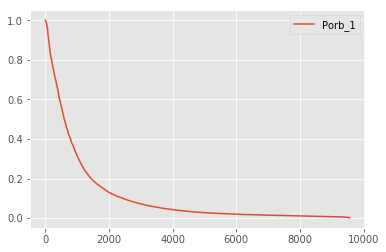

In [241]:
y_pred1 = classifier1.predict_proba(X_test)[:,1]
y_pred1 = pd.DataFrame(y_pred1)
y_pred1.columns = ['Porb_1']
y_pred1 = y_pred1.sort_values('Porb_1', ascending = False)
y_pred1.reset_index(drop=True, inplace=True)
y_pred1.plot(kind = "line")

top_segment = 1500
new_list = y_pred1.iloc[top_segment]
display(new_list)


response_top_segment = y_pred1.iloc[0:top_segment].mean()
print("Average response rate for customers in the new list is ")
display(response_top_segment)

In [242]:
variable.head(10)

,0
0,0.363214
1,0.179899
2,0.066580
3,0.052936
4,0.046122
5,0.043424
6,0.032445
7,0.022652
8,0.021568
9,0.018237


## Business Application

### Case I: Campaign by mailing everyone on list

Mailing everyone in list without using model

Average response rate from customers to mails is 11.1 %

Total customers in list  = 38245 (after data cleaning)

Expected rev from customers for every positive response is $ 10

Cost of each mailing is $ 3

In [243]:
full_list = 41188
rev = 10
cost = 2
response_rate = 0.111

total_campaign_profit = round((response_rate * rev - cost)*full_list)
roi_full_list = round(total_campaign_profit/(cost*full_list)*100)

print ("Mailing everyone in list")
print("Total campaign profit: $", round(total_campaign_profit)) 
print("ROI:", roi_full_list, "%")

Mailing everyone in list
Total campaign profit: $ -36657
ROI: -44 %


Marketing to every person on the list results in a loss of $ 34,000 with a ROI of negative 44 %

### Case II: Campaign based on model

Mailing only to people in target list,

Average response rate in the top customer segment is 49.75% (Applying elbow method on graph shown above)

Total customers in list  = 1500 (Obtained from graph shown above corresponding to 49% response rate)

Expected revenue from customers for every positive response is $ 10

Cost of each mailing is $ 3

In [244]:
new_list = top_segment
response_rate = response_top_segment

total_campaign_profit = round((response_rate * rev - cost)*new_list)
roi_target_list = round(total_campaign_profit/(cost*new_list)*100)

print ("Mailing only targeted list of people suggested by model:")
print("Total campaign profit: $", list(total_campaign_profit)[0])
print("ROI %:", list(roi_target_list)[0])

Mailing only targeted list of people suggested by model:
Total campaign profit: $ 4202.0
ROI %: 140.0


Marketing to people on targetted list results in a profit of $ 4,202 with a ROI of 140%.

Using the model for campaiging improves the campaign ROI to 150% from -44%.

Marketing to new list of people with high probability of conversion identified by the machine learning model, improves response rate to 40%, 4X the overall average response rate of 11% and improves ROI from -44% to 150%.